## Week 16 Final Coursework, Part II

#### Spring Semester, 2020

## Question 6

Use the data in TRAFFIC2.xls. Consider the following regression model:

\begin{equation}
    prcfat = \beta_1 + \beta_2 \cdot wkends + \beta_3 \cdot unem + \beta_4 \cdot spdlaw
        + \beta_5 \cdot beltlaw + \beta_6 \cdot t 
        + \beta_7 \cdot feb + \cdots + \beta_{17} \cdot dec + \epsilon
\end{equation}
where 
- $prcfat$ : percentage of statewide fatal accidents
- $wkends$ : number of weekends in month
- $unem$ : state unemployment rate
- $spdlaw$ : dummy variable, =1 after the 65 mph law is in effect
- $beltlaw$ : dummy variable, =1 after the seatbelt law is in effect
- $t$ : time, we introduce a linear time trend
- $feb, \cdots, dec$ : monthly dummy variables

#### You are required to do the following jobs:

- Basic data plots
- OLS and basic hypothesis test
- Test of $AR(1)$ and general serial correlations
- The heteroskedasticity and autocorrelation consistent standard error (HACSE)
- The feasible generalized least squares (FGLS) estimation

#### For more details, see the guidelines in each block below.

## 国经管 张丛绎 32018200008

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from numpy.linalg import inv
from scipy import stats
from scipy.sparse import diags

In [2]:
lab0 = ['year', 'totacc', 'fatacc', 'injacc', 'pdoacc', 'ntotacc', 'nfatacc', 
        'ninjacc', 'npdoacc', 'rtotacc', 'rfatacc', 'rinjacc', 'rpdoacc',
        'ushigh', 'cntyrds', 'strtes', 't', 'tsq', 'unem', 'spdlaw', 'beltlaw',   
        'wkends', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct',       
        'nov', 'dec', 'ltotacc', 'lfatacc', 'prcfat', 'prcrfat', 'lrtotacc',  
        'lrfatacc', 'lntotacc', 'lnfatacc', 'prcnfat', 'lushigh', 'lcntyrds',  
        'lstrtes', 'spdt', 'beltt', 'prcfat_1']

data0 = pd.read_excel('traffic2.xls', names=lab0)
data0;

## Part (i). 

#### Create dataframe that stores observations of the dependent and independent variables

In [3]:
lab = ['prcfat', 'wkends', 'unem', 'spdlaw', 'beltlaw', 't', 'feb', 'mar',
       'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']  # Read the data for the dependent and independent variables
data = data0[lab]
n, K = np.shape(data) # number of observations, number of independent variables

In [4]:
data

,prcfat,wkends,unem,spdlaw,beltlaw,t,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec
0,0.900990,14,7.9,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,0.913027,12,8.0,0,0,2,1,0,0,0,0,0,0,0,0,0,0
2,0.914997,13,7.4,0,0,3,0,1,0,0,0,0,0,0,0,0,0
3,0.978806,12,7.2,0,0,4,0,0,1,0,0,0,0,0,0,0,0
4,0.914571,15,6.1,0,0,5,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,0.979847,12,4.7,1,1,104,0,0,0,0,0,0,1,0,0,0,0
104,0.947175,14,5.0,1,1,105,0,0,0,0,0,0,0,1,0,0,0
105,0.866921,13,4.6,1,1,106,0,0,0,0,0,0,0,0,1,0,0
106,0.825499,12,4.9,1,1,107,0,0,0,0,0,0,0,0,0,1,0


#### Plot the key variables

- $prcfat$, $wkends$, $unem$, $spdlaw$, $beltlaw$
- Use scatter plot, and add the corresponding y-labels.

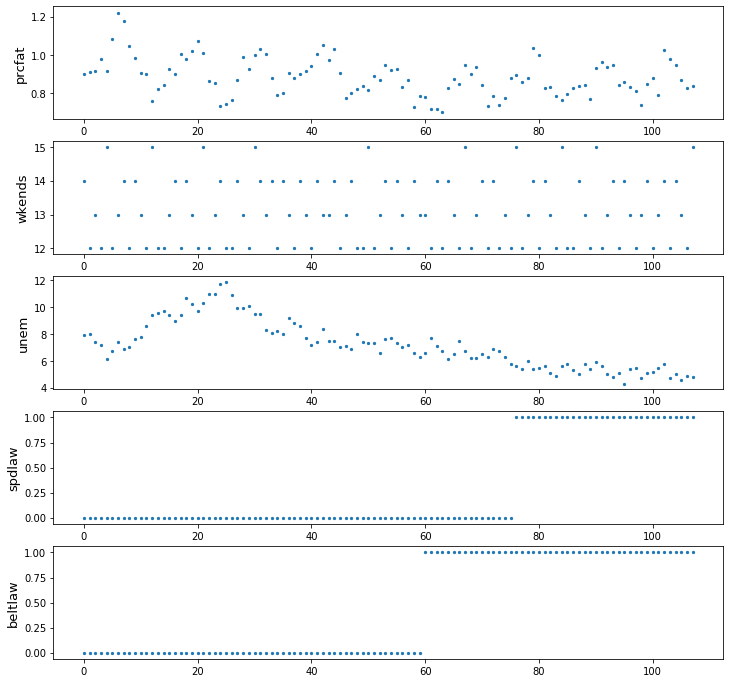

In [5]:
fig, axes = plt.subplots(5, 1, figsize=(12,12))

x_axis = range(n)

for i in range(5):
    axes[i].scatter(x_axis, data.iloc[:, i], s=5)
    axes[i].set_ylabel(lab[i], fontsize=13)
    
plt.show()

### The OLS estimation and the p-values

In [6]:
X = np.empty((n, K))            # create empty space to store data for the independent variables 
X[:, 0] = 1.                    # set the first column of the data matrix X to 1 
X[:, 1:] = data.iloc[:, 1:]     # set the remaining columns of the data matrix X
y = data.iloc[:, 0]          # data for the dependent variable
b = inv(X.T @ X) @ (X.T) @ y         # the OLS estimator b=(X'X)^{-1} X'y

ee = y - X @ b         # the residual vector
s2 = ee @ ee / (n-K)                 # s^2 = e'e/(n-K)
SE = np.sqrt(np.diag(s2 * inv(X.T @ X)))            # the standard error SE(b)

t_ts = b / SE                  # the T test statistic
t_rv = stats.t(n-K)
p_vals = 2 * (1 - t_rv.cdf(abs(t_ts)))           # the p-value

In [7]:
ls = [b, SE, t_ts, p_vals]
for v in ls:
    display(v.round(4))    

array([ 1.0298e+00,  6.0000e-04, -1.5400e-02,  6.7100e-02, -2.9500e-02,
       -2.2000e-03,  9.0000e-04,  1.0000e-04,  5.8200e-02,  7.1600e-02,
        1.0130e-01,  1.7660e-01,  1.9260e-01,  1.6000e-01,  1.0100e-01,
        1.3900e-02,  9.2000e-03])

array([0.103 , 0.0062, 0.0055, 0.0206, 0.0232, 0.0004, 0.029 , 0.0274,
       0.0278, 0.0276, 0.0281, 0.0273, 0.0274, 0.0282, 0.0277, 0.0281,
       0.0279])

array([ 1.00027e+01,  1.01600e-01, -2.78230e+00,  3.26170e+00,
       -1.27010e+00, -5.31150e+00,  2.97000e-02,  3.40000e-03,
        2.09280e+00,  2.59160e+00,  3.60440e+00,  6.47900e+00,
        7.01810e+00,  5.67370e+00,  3.65140e+00,  4.95600e-01,
        3.30300e-01])

array([0.000e+00, 9.193e-01, 6.600e-03, 1.600e-03, 2.073e-01, 0.000e+00,
       9.764e-01, 9.973e-01, 3.920e-02, 1.110e-02, 5.000e-04, 0.000e+00,
       0.000e+00, 0.000e+00, 4.000e-04, 6.213e-01, 7.420e-01])

#### Plot the residual

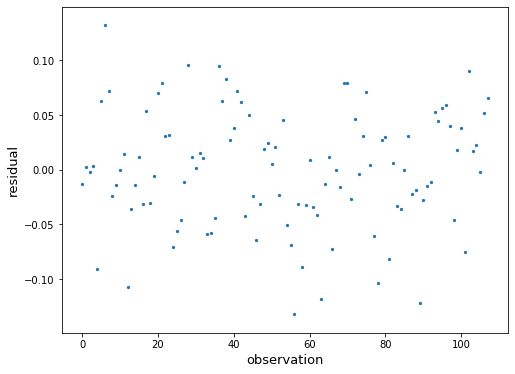

In [8]:
fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(range(n), ee, s=5)
ax.set_xlabel('observation', fontsize=13)
ax.set_ylabel('residual', fontsize=13)

plt.show()

## Part (ii).

### Tests of serial correlation

Suppose the original model is 

\begin{equation}
    y_t = \beta_1 + \beta_2 x_{t2} + \cdots + \beta_K x_{tK} + \epsilon_t,
\end{equation}

where 

\begin{equation}
    \epsilon_t = \rho_1 \epsilon_{t-1} + \cdots + \rho_m \epsilon_{t-m} + u_t,
    \quad \{u_t\} \; \text{ is white noise}.
\end{equation}

We are interested in testing 

\begin{equation}
    H_0 : \rho_1 = \cdots = \rho_m = 0.
\end{equation}

#### Method 1. 

We can simply run the following regression

\begin{equation}
    e_t = \rho_1 e_{t-1} + \cdots + \rho_m e_{t-m} + u_t
\end{equation}

and then test the significance of the estimated $\rho$ values.

In order for this method to work, as we discussed in class, we need to assume strict exogeneity!

##### Use method 1 to test  $AR(1)$ serial correlation

In [9]:
Xr = np.empty((n-1, 1))          # create empty space to store data 

Xr[:, 0] = ee[0:n-1]         # set the first column of the data matrix X to residual
yr = ee[1:n]
br = inv(Xr.T @ Xr) @ (Xr.T) @ yr

er = yr - Xr @ br
s2r = er @ er / (n-2)
SEr = np.sqrt(np.diag(s2r * inv(Xr.T @ Xr)))
ts = stats.t(n-2)
tr = br / SEr
pr = 2 * (1 - ts.cdf(abs(tr)))

In [10]:
display(br, SEr, tr, pr.round(4))

array([0.28157532])

array([0.09389555])

array([2.9988143])

array([0.0034])

#### Is there obvious $AR(1)$ serial correlation?

From the output, we can find that $\rho = 0.28$ with t-statistic $= 2.999$ and $p$-value $= 0.003$, which has a very strong evidence of positive serial correlation according to the 1% level.

#### Method 2. The Breusch-Godfrey (BG) Test

The downside of working with method 1, as we discussed in class, is that
- we need to assume strict exogeneity!

To bypass this inconvenience, we can use the BG test. 
We introduce all independent variables as controls and run

\begin{equation}
    e_t \overset{OLS}{\longrightarrow} e_{t-1}, \cdots, e_{t-m}, x_{t2}, \cdots, x_{tK}.
\end{equation}

One can show that 

\begin{equation}
    LM \equiv (n-m) R^2 \overset{d}{\longrightarrow} \chi^2 (m).
\end{equation}

##### Case 1. Special case $m = 1$, i.e., test $AR(1)$ autocorrelations.

In [11]:
X_bg = np.empty((n-1, K))
X_bg[:, 0] = ee[0:n-1]
X_bg[:, 1:] = data.iloc[1:, 1:]
y_bg = ee[1:n]

b_bg = inv(X_bg.T @ X_bg) @ (X_bg.T) @ y_bg
e2_bg = (y_bg - X_bg @ b_bg) ** 2
del_OLS_bg = inv(X_bg.T @ X_bg) @ (X_bg.T) @ e2_bg
e2_fitted_bg = X_bg @ del_OLS_bg

SST_bg = np.sum((e2_bg - np.mean(e2_bg))**2)
SSE_bg = np.sum((e2_fitted_bg - np.mean(e2_bg))**2)  
R2_bg = SSE_bg / SST_bg  

LM_bg = (n-1) * R2_bg
chi2_rv_bg = stats.chi2(df=1) 
p_val_bg = 1 - chi2_rv_bg.cdf(LM_bg)  

In [13]:
display(R2_bg.round(4), p_val_bg.round(4))

0.1878

0.0

##### Case 2. General m-values

In [ ]:
m = np.random.random_integers(106) # randomly select a m in (1, 106)
X_bg1 = np.empty((n-m, m+K-1))

for i in range(m):
    X_bg1[:, i] = ee[0:n-m]

X_bg1[:, m:] = data.iloc[m:, 1:]
y_bg1 = ee[m:n]

b_bg1 = inv(X_bg1.T @ X_bg1) @ (X_bg1.T) @ y_bg1
e2_bg1 = (y_bg1 - X_bg1 @ b_bg1) ** 2
del_OLS_bg1 = inv(X_bg1.T @ X_bg1) @ (X_bg1.T) @ e2_bg1
e2_fitted_bg1 = X_bg1 @ del_OLS_bg1

SST_bg1 = np.sum((e2_bg1 - np.mean(e2_bg1))**2)
SSE_bg1 = np.sum((e2_fitted_bg1 - np.mean(e2_bg1))**2)  
R2_bg1 = SSE_bg1 / SST_bg1

LM_bg1 = (n-K+1) * R2_bg1
chi2_rv_bg1 = stats.chi2(df=K-1) 
p_val_bg1 = 1 - chi2_rv_bg1.cdf(LM_bg1)  

In [59]:
R2_bg1, p_val_bg1

(1.8622937014028315e+31, 0.0)

#### Compared with the result of method 1, is strict exogeneity a reasonable assumption to make?

Comparing with the result of method1, the stirct exogeneity is reasonable due to the p-value of BG test.

#### Method 3. The Box-Pierce Q Test and the Ljung-Box Q Test

Define the sample autocorrelation coefficient as

\begin{equation}
    \hat \rho_j \equiv 
    \frac{\sum_{t=j+1}^n e_t e_{t-j}}{\sum_{t=1}^n e_t^2},
    \quad j = 1, 2, \cdots, m.
\end{equation}

Then the Box-Pierce Q test statistic is 

\begin{equation}
    Q_{BP} \equiv n \sum_{j=1}^m \hat \rho_j^2
    \overset{d}{\longrightarrow} \chi^2 (m)
\end{equation}

and the Ljung-Box Q test statistic is 

\begin{equation}
    Q_{LB} \equiv n(n+2) \sum_{j=1}^m
    \frac{\hat \rho_j^2}{n-j}
    \overset{d}{\longrightarrow} \chi^2(m).
\end{equation}

In [14]:
m = min(int(n/2)-3, 40)    # define the m

e2_sum1 = 0
numerator1 = 0
rho_hat2 = 0
fraction = 0

# calculate the denominator of rho_j
for t in range(n):
    e2_sum1 += ee[t] ** 2

# calculate the sum of rho_j^2 and the sum of rho_j^2 / (n-j)    
for j in (1, m):
    for t in range(j, n):
        numerator1 += ee[t] * ee[t-j]
    rho_hat2 += (numerator1 / e2_sum1) ** 2
    fraction += (numerator1 / e2_sum1) ** 2 / (n-j)

# calculate the BP Q test and LB Q test statistic
Q_bp = n *  rho_hat2
Q_lb = n * (n+2) * fraction

# calculate the p-values of the BP Q test and LB Q test
chi2_rv = stats.chi2(df=m) 
p_val_bp = 1 - chi2_rv.cdf(Q_bp)
p_val_lb = 1 - chi2_rv.cdf(Q_lb)

In [15]:
display(Q_bp, Q_lb, p_val_bp, p_val_lb)

9.135230387799037

9.871530859705667

0.9999999150725318

0.9999997168652434

#### Method 4. The Durbin-Watson (DW) Test

The DW test statistic is

\begin{equation}
    DW \equiv \frac{\sum_{t=2}^n (e_t - e_{t-1})^2 }{\sum_{t=1}^n e_t^2}
    \approx 2 (1 - \hat \rho_1)
\end{equation}

In particular, we have:
- When $DW = 2$, $\hat \rho_1 \approx 0$, no serial correlation.
- When $DW = 0$, $\hat \rho_1 \approx 1$, positive serial correlation.
- When $DW = 4$, $\hat \rho_1 \approx -1$, negative serial correlation.

In [16]:
# calculate the denominator of DW
e2_sum2 = 0
for t in range(n):
    e2_sum2 += ee[t] ** 2

# calculate the numerator of DW
numerator2 = 0
for t in range(n-1):
    numerator2 += (ee[t+1] - ee[t]) ** 2

# calculate the DW and rho_1
DW = numerator2 / e2_sum2
rho_hat1 = 1 - DW/2

In [18]:
DW.round(4), rho_hat1.round(4)

(1.43, 0.285)

## Part (iii).

### The Newey-West Method

When there is serial correlation, the robust standard error $SE^*(b_k)$ does not work well, but we can use

\begin{equation}
    \text{OLS} \; + \; \text{Heteroskedasticity and Autocorrelation Consistent Standard Error (HACSE or HAC)}.
\end{equation}

This is the so called Newey-West method of estimation. 

In class, we showed that under Assumptions L1-L5 (the large sample assumptions), we have

\begin{equation}
    \sqrt{n} (b-\beta) \overset{d}{\longrightarrow} N\left(0, \text{Avar} (b) \right),
\end{equation}
where

\begin{equation}
    \text{Avar}(b) = [\mathbb{E} (x_i x_i')]^{-1} S [\mathbb{E} (x_i x_i')]^{-1}  
    \quad \text{with } \; S = \mathbb{E} (g_i g_i') = \mathbb{E} (\epsilon_i^2 x_i x_i').
\end{equation}

Under some regularity conditions, one can show that

\begin{equation}
    S_{XX}^{-1} \hat Q S_{XX}^{-1} \overset{p}{\longrightarrow} \text{Avar} (b),
\end{equation}

where
\begin{equation}
    S_{XX} = \frac{1}{n} X'X = \frac{1}{n} \sum_{i=1}^n x_i x_i'
\end{equation}
and
\begin{equation}
    \hat Q = \hat S + 
        \frac{1}{n} \sum_{j=1}^p \sum_{t=j+1}^n 
        \left(
            1 - \frac{j}{p+1}
        \right)
        e_t e_{t-j} \left(x_t x_{t-j}' + x_{t-j} x_t' \right)
\end{equation}
with
\begin{equation}
    \hat S = \frac{1}{n} \sum_{i=1}^n e_i^2 x_i x_i'.
\end{equation}

Here $p$ is the truncation parameter, and in practice, the suggested value is the integer part of

\begin{equation}
    p = n^{1/4} \quad \text{or} \quad p = 0.75 n^{1/3}.
\end{equation}

The HAC standard error of the OLS estimator $b_k$ is then defined by

\begin{equation}
    HACSE(b_k) \equiv 
    \sqrt{\frac{1}{n} \left( S_{XX}^{-1} \hat Q S_{XX}^{-1} \right)_{kk}}
\end{equation}


In [19]:
S_hat = np.zeros((K, K))
Q_hat = np.zeros((K, K))

# calculate the S_hat
for i in range(n):
    ei2 = (y[i] - X[i,:] @ b)**2                        
    xpx = X[i,:].reshape((K,1)) @ X[i,:].reshape((1,K))  
    S_hat += ei2 * xpx
S_hat = S_hat / n           

p = int(n ** 0.25)       # set p as an int

# calculate the Q_hat
for j in range(p):
    part1 = 1 - (j+1)/(p+1)
    for t in range(j+1, n):
        part2 = ee[t] * ee[t-j]
        part3 = X[t, :].reshape((K, 1)) @ X[t-j, :].reshape((1, K))
        part4 = X[t-j, :].reshape((K, 1)) @ X[t, :].reshape((1, K))
        Q_hat += part1 * part2 * (part3 + part4)

Q_hat = S_hat + Q_hat / n

# calculate the HACSE
HACSE_squ = inv((X.T@X) / n) @ Q_hat @ inv((X.T@X) / n)
HACSE = np.sqrt(np.diag(HACSE_squ) / n)

In [20]:
HACSE.round(4)

array([0.141 , 0.0083, 0.0092, 0.0306, 0.0377, 0.0007, 0.0354, 0.0372,
       0.0395, 0.0414, 0.0456, 0.0506, 0.0369, 0.0424, 0.0443, 0.0435,
       0.0388])

#### Hypothesis test based on HACSE

We work with the large sample theory. Under the null hypothesis 

\begin{equation}
    H_0 : \beta_k = \bar \beta_k,
\end{equation}

it follows that 

\begin{equation}
    \frac{b_k - \bar \beta_k}{HACSE(b_k)} 
    \overset{d}{\longrightarrow} N(0,1).
\end{equation}

In [21]:
n_nw = b / HACSE
n_rv = stats.norm(0, 1)
p_val_nw = 2 * (1 - n_rv.cdf(abs(n_nw)))

In [22]:
p_val_nw.round(4)

array([0.000e+00, 9.396e-01, 9.290e-02, 2.820e-02, 4.334e-01, 1.500e-03,
       9.806e-01, 9.980e-01, 1.408e-01, 8.350e-02, 2.640e-02, 5.000e-04,
       0.000e+00, 2.000e-04, 2.260e-02, 7.482e-01, 8.125e-01])

## Part (iv).

### Feasible Generalized Least Squares (FGLS)

Suppose the original regression model is

\begin{equation}
    y = X \beta + \epsilon,
\end{equation}

where

\begin{equation}
    \epsilon_t = \rho \epsilon_{t-1} + u_t,
    \quad |\rho| < 1
    \quad \text{and} \quad
    \{u_t\} \text{ is a white noise process}.
\end{equation}

Let $\rho_j \equiv \text{Cov} (\epsilon_t, \epsilon_{t-j} \mid X)$. Then 

\begin{equation}
    \rho_j = \rho^j \sigma^2, 
    \quad \text{where} \quad 
    \sigma^2 = \frac{\sigma_u^2}{1-\rho^2}
    \quad \text{and} \quad
    \sigma_u^2 = \text{Var}\left(u_t \right).
\end{equation}

Hence,

\begin{equation}
    \text{Var} (\epsilon \mid X) 
    = \sigma^2 
    \begin{bmatrix}
        1 & \rho & \cdots & \rho^{n-1} \\
        \rho & 1 & \cdots & \rho^{n-2} \\
        \vdots & \vdots & & \vdots \\
        \rho^{n-1} & \rho^{n-2} & \cdots & 1 
    \end{bmatrix}
    = \sigma^2 V.
\end{equation}

Indeed, $V$ can be factorized as $V^{-1} = C'C$, where

\begin{equation}
    C 
    = \frac{1}{\sqrt{1-\rho^2}} 
    \begin{bmatrix}
        \sqrt{1-\rho^2} & 0 & \cdots & 0 & 0 \\
        -\rho & 1 & \cdots & 0 & 0 \\
        0 & -\rho & \cdots & 0 & 0 \\
        \vdots & \vdots & & \vdots & \vdots \\
        0 & 0 & \cdots & -\rho & 1 
    \end{bmatrix}.
\end{equation}


#### The Prais-Winstern (PW) method

Transform the original problem by defining

\begin{equation}
    \tilde y = \sqrt{1- \rho^2} C y,
    \quad \tilde X = \sqrt{1- \rho^2} C X
    \quad \text{and} \quad
    \tilde \epsilon = \sqrt{1- \rho^2} C \epsilon,
\end{equation}

and then run the OLS regression

\begin{equation}
    \tilde y = \tilde X \beta + \tilde \epsilon.    \qquad  (*)
\end{equation}

#### The Cochrane-Orcutt (CO) method

- Run the same OLS regression as $(*)$, but now drop the first 'transformed' observation.


#### FGLS

In practice, $\rho$ is not observable, but we can estimate it via OLS:

\begin{equation}
    e_t = \rho e_{t-1} + error.
\end{equation}

Moreover, both the Prais-Winstern method and the Cochrane-Orcutt method are used in iterative schemes.

Step 1. Do OLS and get
\begin{equation}
    y = Xb + e.
\end{equation}

Step 2. Do OLS and get 
\begin{equation}
    e_t = \hat \rho^{(0)} e_{t-1} + residual.
\end{equation}

Step 3. While 

\begin{equation}
    \left|\hat \rho^{(i+1)} - \hat \rho^{(i)} \right| > \delta 
    \quad \text{or} \quad 
    \text{distance} \left(\hat \beta^{(i+1)}, \hat \beta^{(i)} \right) > \delta,
\end{equation}

where $\delta$ is the tolerance level (typically a very small number),

- do FGLS based on $\hat \rho^{(i)}$, and get the FGLS estimator $\hat \beta^{(i)}$, and then caculate the updated residual
    \begin{equation}
        e^{(i)} = y - X \hat \beta^{(i)} ,
    \end{equation}

- do OLS and get 
    \begin{equation}
        e_t^{(i)} = \hat \rho^{(i+1)} e_{t-1}^{(i)} + residual.
    \end{equation}

#### The PW method

In [23]:
Xe = np.empty((n-1, 1))
Xe[:, 0] = ee[0:n-1]
ye = ee[1:n]
rho_0 = inv(Xe.T @ Xe) @ (Xe.T) @ ye
rho_0 = rho_0.item()

b_0 = b

tol = 1e-4
err = tol + 1

while err > tol:
    elm1 = np.ones(n)
    elm1[0] = np.sqrt(1 - rho_0**2)
    elm2 = -rho_0 * np.ones(n-1)
    elm = [elm1, elm2]
    D = diags(elm, [0, -1]).todense()
    y_tld = D @ y
    X_tld = D @ X
    b_1 = inv(X_tld.T @ X_tld) @ (X_tld.T) @ y_tld
    b_1 = np.asarray(b_1).flatten()
    
    e1 = y - X @ b_1
    Xe1 = np.empty((n-1, 1))
    Xe1[:, 0] = e1[0:n-1]
    ye1 = e1[1:n]
    rho_1 = inv(Xe1.T @ Xe1) @ (Xe1.T) @ ye1
    
    err = max(abs(rho_1 - rho_0), max(abs(b_1 - b_0)))
    b_0 = b_1
    rho_0 = rho_1
    
e_pw = y_tld - X_tld @ b_1
e_pw = np.asarray(e_pw).flatten()
s2_pw = e_pw @ e_pw / (n-K)
SE_pw = np.sqrt(np.diag(s2_pw * inv(X_tld.T @ X_tld)))
t_pw = b_1 / SE_pw
t_rv_pw = stats.t(n-K)
p_pw = 2 * (1 - t_rv_pw.cdf(abs(t_pw)))

In [24]:
ls2 = [b_1, SE_pw, t_pw, p_pw]
for v in ls2:
    display(v.round(4))

array([ 1.0087e+00,  6.0000e-04, -1.3200e-02,  6.4100e-02, -2.4800e-02,
       -2.1000e-03, -9.0000e-04, -1.2000e-03,  5.7600e-02,  7.1800e-02,
        1.0070e-01,  1.7480e-01,  1.9200e-01,  1.5990e-01,  1.0080e-01,
        1.3300e-02,  8.5000e-03])

array([0.1016, 0.005 , 0.0071, 0.0268, 0.0301, 0.0005, 0.0244, 0.0263,
       0.0276, 0.0279, 0.0281, 0.0273, 0.0276, 0.0283, 0.0277, 0.0273,
       0.0246])

array([ 9.9277,  0.1232, -1.8548,  2.3936, -0.8242, -3.9221, -0.0372,
       -0.0442,  2.0862,  2.578 ,  3.5898,  6.4045,  6.9574,  5.6472,
        3.6381,  0.4873,  0.3479])

array([0.000e+00, 9.022e-01, 6.690e-02, 1.870e-02, 4.120e-01, 2.000e-04,
       9.704e-01, 9.648e-01, 3.980e-02, 1.150e-02, 5.000e-04, 0.000e+00,
       0.000e+00, 0.000e+00, 5.000e-04, 6.272e-01, 7.287e-01])

#### The CO method

In [25]:
Xe = np.empty((n-1, 1))
Xe[:, 0] = ee[0:n-1]
ye = ee[1:n]
rho_0 = inv(Xe.T @ Xe) @ (Xe.T) @ ye
rho_0 = rho_0.item()

b_0 = b

tol = 1e-4
err = tol + 1

while err > tol:
    D_c = np.delete(D, 0, axis=0)
    y_tldc = D_c @ y
    X_tldc = D_c @ X
    b_2 = inv(X_tldc.T @ X_tldc) @ (X_tldc.T) @ y_tldc
    b_2 = np.asarray(b_2).flatten()
    
    e2 = y - X @ b_2
    Xe2 = np.empty((n-1, 1))
    Xe2[:, 0] = e2[0:n-1]
    ye2 = e2[1:n]
    rho_2 = inv(Xe2.T @ Xe2) @ (Xe2.T) @ ye2
    
    err = max(abs(rho_2 - rho_0), max(abs(b_2 - b_0)))
    b_0 = b_2
    rho_0 = rho_2
    
e_co = y_tldc - X_tldc @ b_2
e_co = np.asarray(e_co).flatten()
s2_co = e_co @ e_co / (n-K)
SE_co = np.sqrt(np.diag(s2_co * inv(X_tldc.T @ X_tldc)))
t_co = b_2 / SE_co
t_rv_co = stats.t(n-K)
p_co = 2 * (1 - t_rv_co.cdf(abs(t_co)))

In [27]:
ls3 = [b_2, SE_co, t_co, p_co]
for v in ls3:
    display(v.round(4))

array([ 1.0139e+00,  6.0000e-04, -1.3500e-02,  6.4700e-02, -2.4500e-02,
       -2.2000e-03, -1.9000e-03, -2.5000e-03,  5.6000e-02,  7.0200e-02,
        9.9200e-02,  1.7340e-01,  1.9050e-01,  1.5840e-01,  9.9300e-02,
        1.2000e-02,  7.4000e-03])

array([0.1049, 0.005 , 0.0073, 0.0269, 0.0301, 0.0006, 0.0249, 0.0272,
       0.0286, 0.0291, 0.0291, 0.0281, 0.0286, 0.0294, 0.0287, 0.0281,
       0.0252])

array([ 9.6636,  0.1261, -1.8537,  2.4018, -0.8141, -3.7933, -0.0746,
       -0.0931,  1.9567,  2.4099,  3.4057,  6.1659,  6.6596,  5.395 ,
        3.4605,  0.4252,  0.2942])

array([0.000e+00, 9.000e-01, 6.700e-02, 1.830e-02, 4.177e-01, 3.000e-04,
       9.407e-01, 9.260e-01, 5.350e-02, 1.800e-02, 1.000e-03, 0.000e+00,
       0.000e+00, 0.000e+00, 8.000e-04, 6.717e-01, 7.693e-01])